# Panel Data Subsidy Optimization

There is some production function or other functional relationship between x and y. When x shifts, y shifts. We are interested in some function over the vector of y. We shift x to maximize some objective over the vector of y. 

$$
\max_{\left\{S_i\right\}_{i \in \left\{1,...,N\right\}}}
O \left(
    \left\{ 
    Y_{it}(X_{it}, S_i) 
    \right\}^{i \in \left\{1,...,N\right\}}
    _{t \in \left\{1,...,T\right\}}
 \right)
$$

Specifically: there is a finite amount of subsidies, there are three individuals observed between month 0 and 24. What  are the optimal nutritional subsidies to provide to the three individuals given some function that relates nutritional input to outcome (height), ignoring behavior responses.

Only some of the codes here can be re-used. 

## Use Program

### Load Data

In [1]:
# Library
library(tidyverse)

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/')
df <- read_csv('height_weight.csv')

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  S.country = col_character(),
  vil.id = col_integer(),
  indi.id = col_integer(),
  sex = col_character(),
  svymthRound = col_integer(),
  momEdu = col_double(),
  wealthIdx = col_double(),
  hgt = col_double(),
  wgt = col_double(),
  hgt0 = col_double(),
  wgt0 = col_double(),
  prot = col_double(),
  cal = col_double(),
  p.A.prot = col_double(),
  p.A.nProt = col_double()
)


### Data Selection

We only need information from several individuals

In [2]:
# Select 2 individuals, information from second year, four variables
df.i2t6xy <- df %>% filter(svymthRound <= 24 & svymthRound >= 14 & 
              S.country == 'Cebu' & (indi.id == 4 | indi.id == 13)) %>% 
            select(i = indi.id, t = svymthRound, y = hgt, x =prot)
t(df.i2t6xy)

i,4.0,4.0,4.0,4.0,4.0,4.0,13.0,13.0,13.0,13.0,13.0,13.0
t,14.0,16.0,18.0,20.0,22.0,24.0,14.0,16.0,18.0,20.0,22.0,24.0
y,71.2,72.6,74.3,76.7,76.2,78.1,75.0,75.4,75.5,78.4,79.2,78.7
x,1.8,2.5,7.2,10.1,9.2,10.3,8.3,4.2,5.3,6.2,5.8,11.0


### Subsidy Group Index

Generate linear index for subsidy groups.

In [3]:
var.grp.idx <- 'subsidy.grp'
vars.subsidy.group <- c('i')
df.i2t6xy <- df.i2t6xy %>% mutate(!!var.grp.idx := group_indices(., !!!syms(vars.subsidy.group)))
t(df.i2t6xy)
sca.subsidy.groups <- length(unique(df.i2t6xy[[var.grp.idx]]))
sca.subsidy.groups

i,4.0,4.0,4.0,4.0,4.0,4.0,13.0,13.0,13.0,13.0,13.0,13.0
t,14.0,16.0,18.0,20.0,22.0,24.0,14.0,16.0,18.0,20.0,22.0,24.0
y,71.2,72.6,74.3,76.7,76.2,78.1,75.0,75.4,75.5,78.4,79.2,78.7
x,1.8,2.5,7.2,10.1,9.2,10.3,8.3,4.2,5.3,6.2,5.8,11.0
subsidy.grp,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


[1] 2

### Input/Output Relationship and Prediction with Changes in X

Estimate a production function relationship between the input and output

Prediction can be re-done changing x (which is how we will change subsidy)

In [4]:
# Regression and Results
res.linfe <- lm(log(y) ~ log(x) + factor(i) , data=df.i2t6xy)
summary(res.linfe)


Call:
lm(formula = log(y) ~ log(x) + factor(i), data = df.i2t6xy)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036535 -0.005822 -0.000627  0.006491  0.032371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.24563    0.01996 212.700  < 2e-16 ***
log(x)       0.04023    0.01057   3.804  0.00419 ** 
factor(i)13  0.02326    0.01160   2.004  0.07601 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01993 on 9 degrees of freedom
Multiple R-squared:  0.6983,	Adjusted R-squared:  0.6312 
F-statistic: 10.41 on 2 and 9 DF,  p-value: 0.004552


In [5]:
# Regression Predition, with Changes in X
y.predict <- exp(predict(res.linfe))
y.predict.subsidy <- exp(predict(res.linfe, (df.i2t6xy %>% mutate(x = x + 1))))
cbind(y.predict, y.predict.subsidy - y.predict, df.i2t6xy)

y.predict,y.predict.subsidy - y.predict,i,t,y,x,subsidy.grp
71.46981,1.2816855,4,14,71.2,1.8,1
72.42057,0.9869368,4,16,72.6,2.5,1
75.56883,0.3964018,4,18,74.3,7.2,1
76.60478,0.2914962,4,20,76.7,10.1,1
76.31770,0.3174504,4,22,76.2,9.2,1
76.66523,0.2863060,4,24,78.1,10.3,1
77.79083,0.3568153,13,14,75.0,8.3,2
75.68810,0.6530987,13,16,75.4,4.2,2
76.39972,0.5330764,13,18,75.5,5.3,2
76.88329,0.4638823,13,20,78.4,6.2,2


## Dataframe with predicitons from different subsidies

Given fixed total subsidy available, distribute over the two subsidy groups. (2 individuals)

A vector of policy determined by proportion of subsidies to the two individauls.

Results below show subsidy effects on height at individual months. 

Then we try a vector of subsidies from 0 percent to 100 percent of total subsidy for the 1st of 2 individuals, and look at the resulting height differences between the two individuals. 

It is clear that differential subsidies lead to more or less inequality. 

In [6]:
# subsidy_total <- 2
# vec_frac <- c(0.1, 0.9)
# df <- df.i2t6xy
f_subsidy_y <- function(df, var.grp.idx, res.linfe, subsidy.total, vec.subsidy.frac) {
    return(df %>% mutate(subsidy_grp = paste0(vec.subsidy.frac, collapse=','),
                         subsidy = subsidy.total*vec.subsidy.frac[df[[var.grp.idx]]]) %>% 
            mutate(y_subsidy = exp(predict(res.linfe,
                                           (df %>% mutate(x = x + subsidy))))))
}
# For only two people
f_subsidy_y_n2_wrapper <- function(df, var.grp.idx, res.linfe, subsidy.total=2, sca.subsidy.frac=0.5) {
    vec.subsidy.frac = c(sca.subsidy.frac, (1-sca.subsidy.frac))
    # do not need to store both, just one for subsidy.grp, given only 2 groups
    f_subsidy_y(df.i2t6xy, var.grp.idx, res.linfe, subsidy.total, vec.subsidy.frac) %>%
        mutate(subsidy.grp = sca.subsidy.frac)
}

In [7]:
# Test Function One Subsidy
f_subsidy_y(df.i2t6xy, var.grp.idx, res.linfe, subsidy.total = 2, vec.subsidy.frac = c(0.1, 0.9))

i,t,y,x,subsidy.grp,subsidy_grp,subsidy,y_subsidy
4,14,71.2,1.8,1,"0.1,0.9",0.2,71.77338
4,16,72.6,2.5,1,"0.1,0.9",0.2,72.64514
4,18,74.3,7.2,1,"0.1,0.9",0.2,75.65217
4,20,76.7,10.1,1,"0.1,0.9",0.2,76.66523
4,22,76.2,9.2,1,"0.1,0.9",0.2,76.38375
4,24,78.1,10.3,1,"0.1,0.9",0.2,76.72456
13,14,75.0,8.3,2,"0.1,0.9",1.8,78.40750
13,16,75.4,4.2,2,"0.1,0.9",1.8,76.78194
13,18,75.5,5.3,2,"0.1,0.9",1.8,77.30367
13,20,78.4,6.2,2,"0.1,0.9",1.8,77.67571


### Greatest Equality and Greatest Total Height Month 24

if we care only about month 24 height
- Which subsidy achieves the greatest level of total height for the two individuals?
    + 0.496 and 0.504 (See below)
- Which subsidy achieves the greatest level of equality (leontiff)?
    + 0.674 and 0.326 (See below)

In [8]:
# Function loop over subsidies
vec.sca.subsidy.frac <- seq(0, 1, 0.001)
subsidy.total <- 100
df.all.subsidy <- bind_rows(lapply(vec.sca.subsidy.frac, f_subsidy_y_n2_wrapper, 
                                   df=df.i2t6xy, var.grp.idx=var.grp.idx, res.linfe=res.linfe,
                                   subsidy.total=subsidy.total))

In [9]:
# Summarize Results
df.t24.hgt <- df.all.subsidy %>% filter(t == 24) %>% 
                group_by(subsidy_grp, subsidy.grp, i) %>% summarize(y_subsidy_mean = mean(y_subsidy)) %>%
                spread(i, y_subsidy_mean, sep='_') %>% 
                mutate_at(vars(contains("i_")), as.numeric) %>% 
                mutate(total.hgt = i_4 + i_13, min.hgt = min(i_4, i_13), mth = 't24')
# Which Subsidy Achieves Greaterest Equality
head(df.t24.hgt %>% arrange(desc(total.hgt)), 3)
head(df.t24.hgt %>% arrange(desc(min.hgt)), 3)

subsidy_grp,subsidy.grp,i_4,i_13,total.hgt,min.hgt,mth
"0.496,0.504",0.496,82.29186,84.31226,166.6041,82.29186,t24
"0.497,0.503",0.497,82.29738,84.30673,166.6041,82.29738,t24
"0.495,0.505",0.495,82.28632,84.31778,166.6041,82.28632,t24


subsidy_grp,subsidy.grp,i_4,i_13,total.hgt,min.hgt,mth
"0.674,0.326",0.674,83.15770,83.15904,166.3167,83.15770,t24
"0.673,0.327",0.673,83.15339,83.16671,166.3201,83.15339,t24
"0.675,0.325",0.675,83.16200,83.15136,166.3134,83.15136,t24


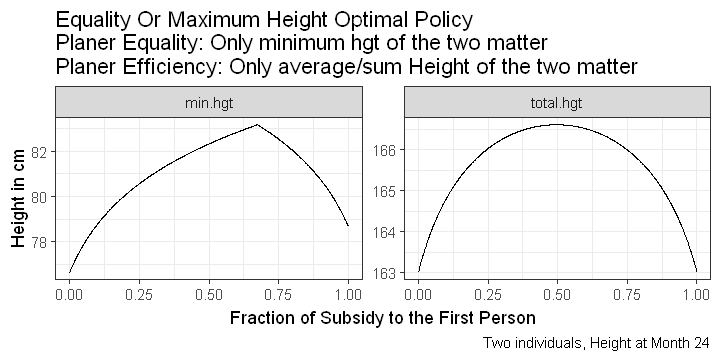

In [10]:
# Graphical Results
options(repr.plot.width = 6, repr.plot.height = 3)
title_line2 <- 'Planer Equality: Only minimum hgt of the two matter'
title_line3 <- 'Planer Efficiency: Only average/sum Height of the two matter'
title_x <- 'Fraction of Subsidy to the First Person'
title_y <- 'Height in cm'
caption <- 'Two individuals, Height at Month 24'
df.t24.hgt %>% gather(variable, value, -mth, -subsidy.grp, -subsidy_grp, -matches('i_')) %>%
    ggplot(aes(x=subsidy.grp, y=value)) +
    geom_line() + facet_wrap( ~ variable, scale='free') +
    labs(title = paste0('Equality Or Maximum Height Optimal Policy\n', title_line2,
                        '\n', title_line3 ),
           x = title_x, y = title_y, caption = caption) +
      theme_bw()

### Greatest Equality and Greatest Total Height Mth 12 + 24

if we care only about month 2 to 14 height
- Which subsidy achieves the greatest level of total height for the two individuals?
    + 0.526 and 0.474 (See below)
- Which subsidy achieves the greatest level of equality (leontiff)?
    + 0.687 and 0.313 (See below)

In [11]:
# Summarize Results
df.t2t12.hgt <- df.all.subsidy %>% filter(t <= 14 & t >= 2) %>% 
                group_by(subsidy_grp, subsidy.grp, i) %>% summarize(y_subsidy_mean = mean(y_subsidy)) %>%
                spread(i, y_subsidy_mean, sep='_') %>% 
                mutate_at(vars(contains("i_")), as.numeric) %>% 
                mutate(total.hgt = i_4 + i_13, min.hgt = min(i_4, i_13), mth = 't2 to t14')
# Which Subsidy Achieves Greaterest Equality
head(df.t2t12.hgt %>% arrange(desc(total.hgt)), 3)
head(df.t2t12.hgt %>% arrange(desc(min.hgt)), 3)

subsidy_grp,subsidy.grp,i_4,i_13,total.hgt,min.hgt,mth
"0.526,0.474",0.526,81.97363,83.98245,165.9561,81.97363,t2 to t14
"0.525,0.475",0.525,81.96756,83.98851,165.9561,81.96756,t2 to t14
"0.527,0.473",0.527,81.97969,83.97638,165.9561,81.97969,t2 to t14


subsidy_grp,subsidy.grp,i_4,i_13,total.hgt,min.hgt,mth
"0.687,0.313",0.687,82.83303,82.83774,165.6708,82.83303,t2 to t14
"0.688,0.312",0.688,82.83775,82.82932,165.6671,82.82932,t2 to t14
"0.686,0.314",0.686,82.82830,82.84615,165.6744,82.82830,t2 to t14


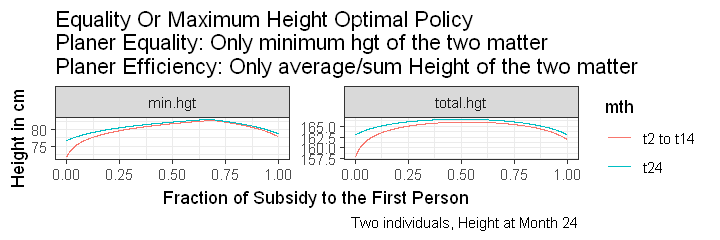

In [12]:
# Graphical Results
options(repr.plot.width = 6, repr.plot.height = 2)
bind_rows(df.t24.hgt, df.t2t12.hgt) %>% 
    gather(variable, value, -mth, -subsidy.grp, -subsidy_grp, -matches('i_')) %>%
    ggplot(aes(x=subsidy.grp, y=value, colour=mth)) +
    geom_line() + facet_wrap( ~ variable, scale='free') + 
    labs(title = paste0('Equality Or Maximum Height Optimal Policy\n', title_line2,
                        '\n', title_line3 ),
           x = title_x, y = title_y, caption = caption) +
      theme_bw()